<a href="https://colab.research.google.com/github/SkyTong/DS440/blob/main/LSTM_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [91]:
merged_data = pd.read_csv('/content/processed_daily_data.csv',index_col=0)
merged_data

,Unnamed: 0,Date,SP500,DOW30,EuroStoxx50,NASDAQ,CrudeOil,SSE,Gold,VIX,...,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
7,7.0,2022-02-07,4483.870117,35091.128906,4120.560059,14015.669922,91.320000,3429.580078,1820.599976,22.860001,...,262034,708920351,22948,18.010471,722252,1.807953e+08,2.669053e+13,634.059259,1220094,18951581
8,8.0,2022-02-08,4521.540039,35462.781250,4129.250000,14194.450195,89.360001,3452.629883,1826.599976,21.440001,...,276850,709197201,23752,43.189954,722406,2.046145e+08,2.669053e+13,560.248366,1269141,18952606
9,9.0,2022-02-09,4587.180176,35768.058594,4204.089844,14490.370117,89.660004,3479.949951,1835.199951,19.959999,...,265804,709463005,21082,20.272357,722546,1.854157e+08,2.669053e+13,618.258993,1412872,18953425
10,10.0,2022-02-10,4504.080078,35241.589844,4197.069824,14185.639648,89.879997,3485.909912,1836.199951,23.910000,...,260813,709723818,21476,20.544074,722693,1.945608e+08,2.669053e+13,589.198630,1389048,18954337
11,11.0,2022-02-11,4418.640137,34738.058594,4155.229980,13791.150391,93.099998,3462.949951,1840.800049,27.360001,...,258595,709982413,20452,15.155736,722835,1.912526e+08,2.669053e+13,599.390071,1526755,18955312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,745.0,2024-02-15,5029.729980,38773.121094,4743.169922,15906.169922,78.029999,2865.903076,2002.099976,14.010000,...,303306,965991635,24170,3.222092,830643,6.060194e+08,7.756333e+13,549.705128,2080268,19629025
746,746.0,2024-02-16,5005.569824,38627.988281,4765.649902,15775.650391,79.190002,2865.903076,2011.500000,14.240000,...,312782,966304417,21666,2.991963,830777,5.467598e+08,8.172530e+13,641.977444,1807967,19629862
747,747.0,2024-02-17,5005.569824,38627.988281,4765.649902,15775.650391,79.190002,2865.903076,2011.500000,14.240000,...,327713,966632130,16967,1.708139,830927,6.086717e+08,8.172530e+13,576.677852,1848949,19630800
748,748.0,2024-02-18,5005.569824,38627.988281,4765.649902,15775.650391,79.190002,2865.903076,2011.500000,14.240000,...,343417,966975547,15213,1.676919,831048,4.904280e+08,8.172530e+13,715.716667,1848168,19631556


In [92]:


# Remove the first column
merged_data = merged_data.drop(merged_data.columns[0], axis=1)

# Now org_df will have the first column removed
merged_data


,Date,SP500,DOW30,EuroStoxx50,NASDAQ,CrudeOil,SSE,Gold,VIX,Nikkei225,...,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
7,2022-02-07,4483.870117,35091.128906,4120.560059,14015.669922,91.320000,3429.580078,1820.599976,22.860001,27248.869141,...,262034,708920351,22948,18.010471,722252,1.807953e+08,2.669053e+13,634.059259,1220094,18951581
8,2022-02-08,4521.540039,35462.781250,4129.250000,14194.450195,89.360001,3452.629883,1826.599976,21.440001,27284.519531,...,276850,709197201,23752,43.189954,722406,2.046145e+08,2.669053e+13,560.248366,1269141,18952606
9,2022-02-09,4587.180176,35768.058594,4204.089844,14490.370117,89.660004,3479.949951,1835.199951,19.959999,27579.869141,...,265804,709463005,21082,20.272357,722546,1.854157e+08,2.669053e+13,618.258993,1412872,18953425
10,2022-02-10,4504.080078,35241.589844,4197.069824,14185.639648,89.879997,3485.909912,1836.199951,23.910000,27696.080078,...,260813,709723818,21476,20.544074,722693,1.945608e+08,2.669053e+13,589.198630,1389048,18954337
11,2022-02-11,4418.640137,34738.058594,4155.229980,13791.150391,93.099998,3462.949951,1840.800049,27.360001,27696.080078,...,258595,709982413,20452,15.155736,722835,1.912526e+08,2.669053e+13,599.390071,1526755,18955312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2024-02-15,5029.729980,38773.121094,4743.169922,15906.169922,78.029999,2865.903076,2002.099976,14.010000,38157.941406,...,303306,965991635,24170,3.222092,830643,6.060194e+08,7.756333e+13,549.705128,2080268,19629025
746,2024-02-16,5005.569824,38627.988281,4765.649902,15775.650391,79.190002,2865.903076,2011.500000,14.240000,38487.238281,...,312782,966304417,21666,2.991963,830777,5.467598e+08,8.172530e+13,641.977444,1807967,19629862
747,2024-02-17,5005.569824,38627.988281,4765.649902,15775.650391,79.190002,2865.903076,2011.500000,14.240000,38487.238281,...,327713,966632130,16967,1.708139,830927,6.086717e+08,8.172530e+13,576.677852,1848949,19630800
748,2024-02-18,5005.569824,38627.988281,4765.649902,15775.650391,79.190002,2865.903076,2011.500000,14.240000,38487.238281,...,343417,966975547,15213,1.676919,831048,4.904280e+08,8.172530e+13,715.716667,1848168,19631556


In [93]:
merged_data.set_index('Date', inplace=True)
merged_data.index

Index(['2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
       '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
       ...
       '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13', '2024-02-14',
       '2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19'],
      dtype='object', name='Date', length=743)

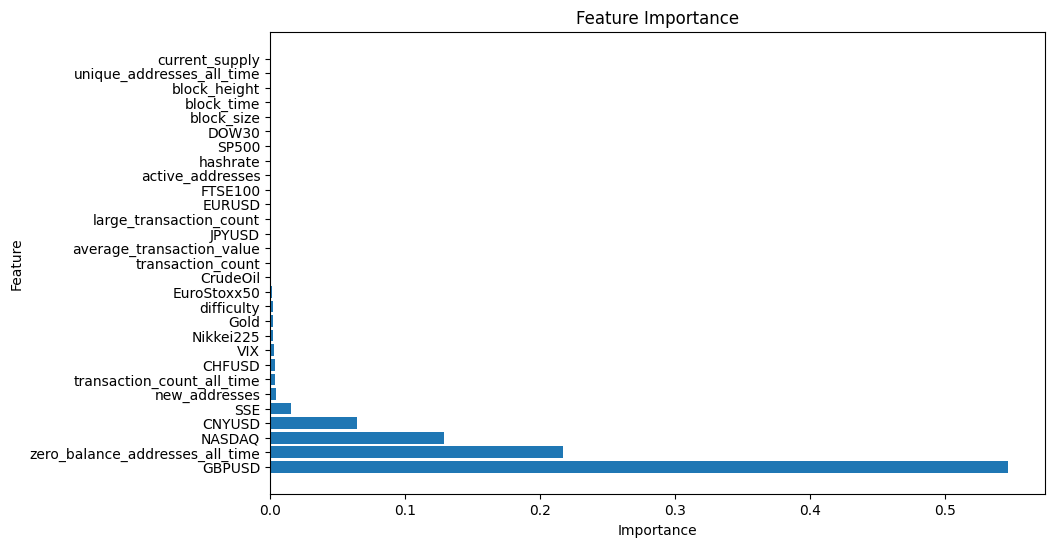

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Prepare data
X = merged_data.drop(columns=['BTC'])  # Features
y = merged_data['BTC']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Feature importance
feature_importance = xgb_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


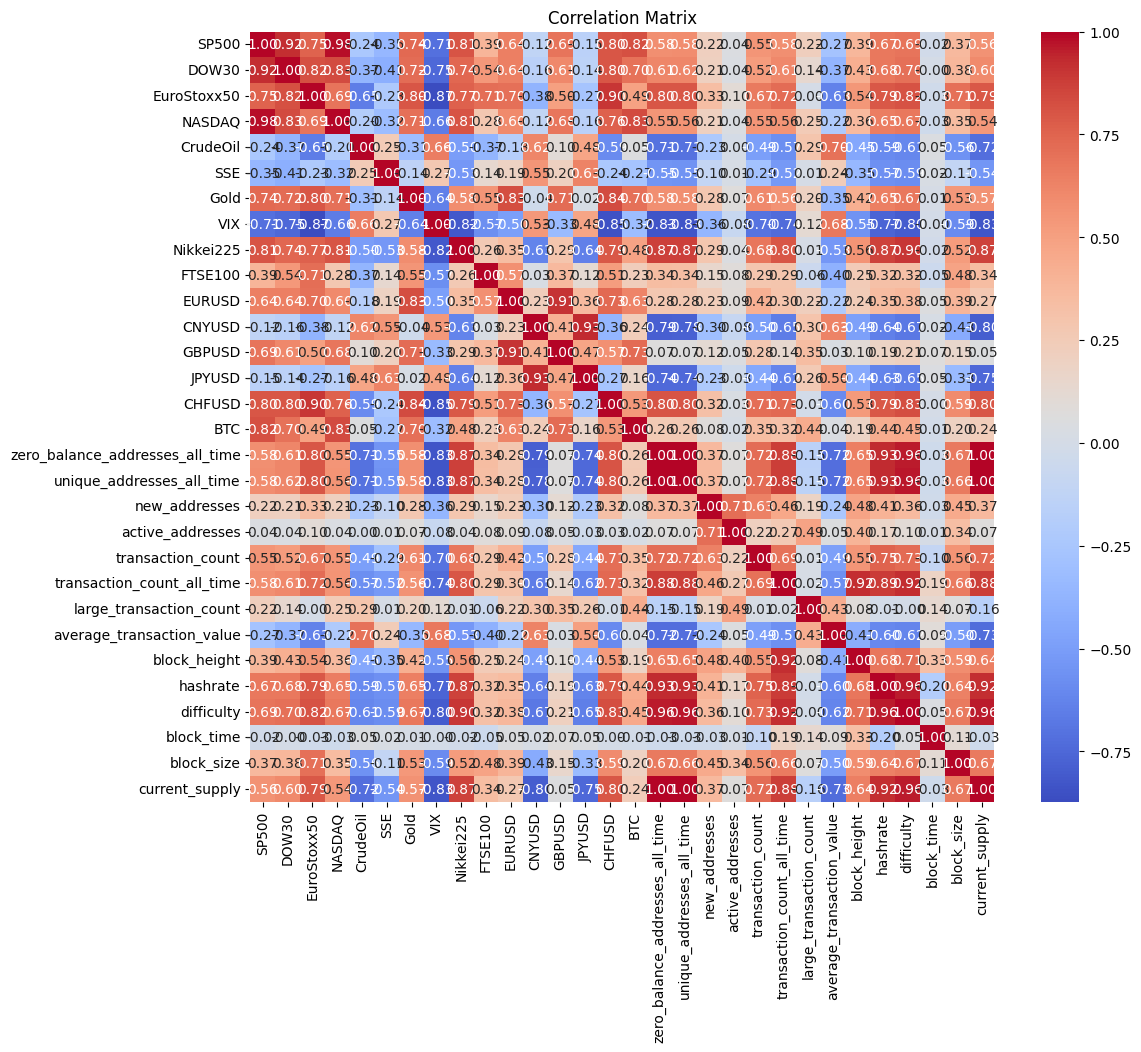

In [95]:

import seaborn as sns

# Drop 'high' and 'low' columns


# Calculate correlation matrix
corr_matrix = merged_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



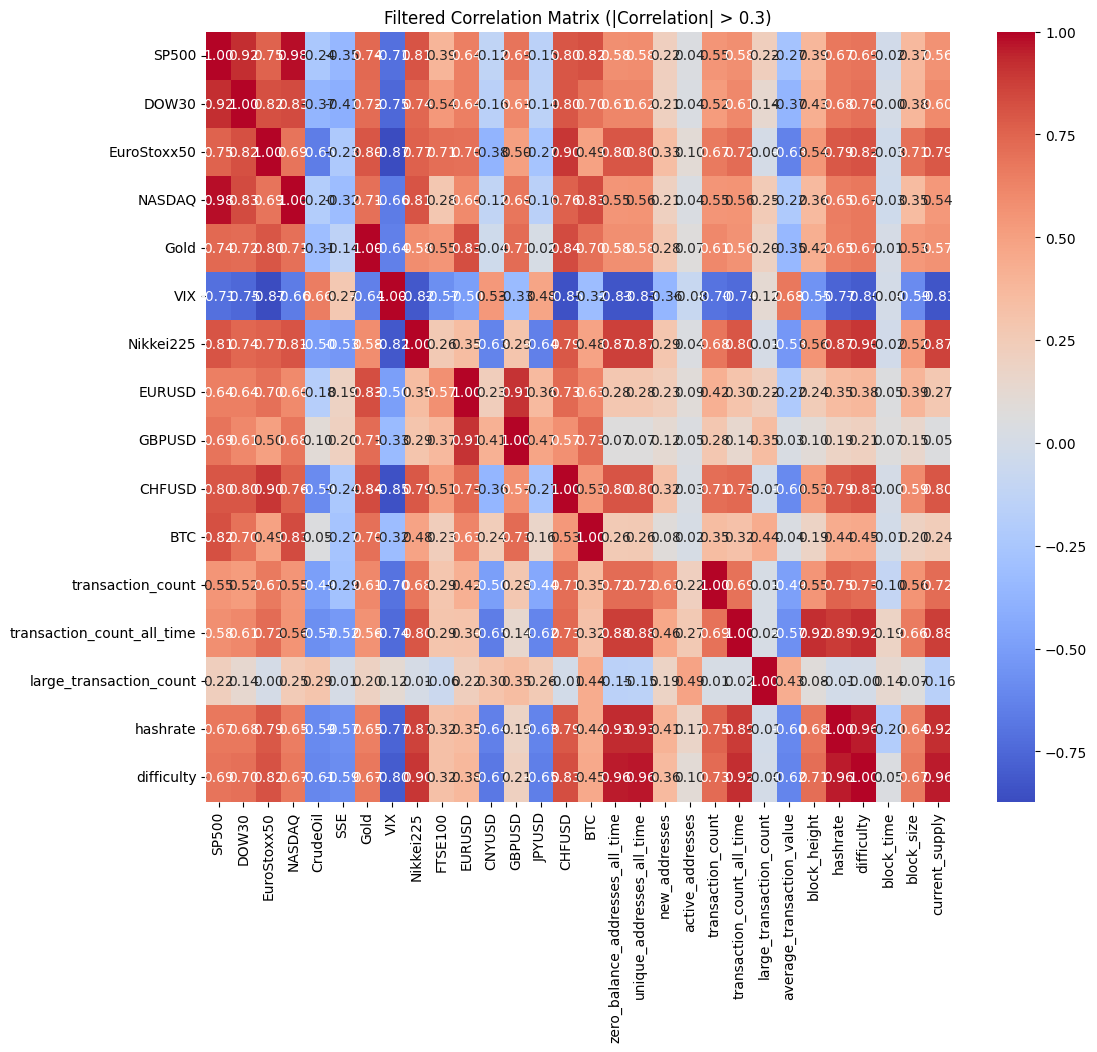

In [96]:
filtered_corr_matrix = corr_matrix[(corr_matrix['BTC'] < -0.3) | (corr_matrix['BTC'] > 0.3)]

# Plot the filtered correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Filtered Correlation Matrix (|Correlation| > 0.3)')
plt.show()

#configuration

In [ ]:
expr_name = 'expr_1'
look_back = 24*60 # 60 days, as each entry is for 1 hour
lstm_layers = 32
epochs=5
batch_size=128

#Dataset scalling

In [97]:
# Extract y-axis columns from the filtered correlation matrix
y_axis_columns = filtered_corr_matrix.index

# Print the extracted columns
print(y_axis_columns)



Index(['SP500', 'DOW30', 'EuroStoxx50', 'NASDAQ', 'Gold', 'VIX', 'Nikkei225',
       'EURUSD', 'GBPUSD', 'CHFUSD', 'BTC', 'transaction_count',
       'transaction_count_all_time', 'large_transaction_count', 'hashrate',
       'difficulty'],
      dtype='object')


In [98]:
# List of columns to keep from corr_merged_data

columns_to_keep = y_axis_columns



# Filter the merged_data DataFrame to keep only the desired columns
filtered_merged_data = merged_data[columns_to_keep]

# Additionally, add back the 'Datetime' column to filtered_merged_data
# if it was removed previously
"""
if 'Date' in merged_data.columns:
    filtered_merged_data['Date'] = merged_data['Date']


# Reorder columns in filtered_merged_data DataFrame
filtered_merged_data = filtered_merged_data[['Date'] + [col for col in filtered_merged_data.columns if col != 'Date']]

# Now, the 'Datetime' column should be the first column in filtered_merged_data

# Now, filtered_merged_data should have the same columns as corr_merged_data (except 'Datetime')
# and still contain the 'Datetime' column
filtered_merged_data
"""

"\nif 'Date' in merged_data.columns:\n    filtered_merged_data['Date'] = merged_data['Date']\n\n\n# Reorder columns in filtered_merged_data DataFrame\nfiltered_merged_data = filtered_merged_data[['Date'] + [col for col in filtered_merged_data.columns if col != 'Date']]\n\n# Now, the 'Datetime' column should be the first column in filtered_merged_data\n\n# Now, filtered_merged_data should have the same columns as corr_merged_data (except 'Datetime')\n# and still contain the 'Datetime' column\nfiltered_merged_data\n"

In [99]:
filtered_merged_data

,SP500,DOW30,EuroStoxx50,NASDAQ,Gold,VIX,Nikkei225,EURUSD,GBPUSD,CHFUSD,BTC,transaction_count,transaction_count_all_time,large_transaction_count,hashrate,difficulty
Date,,,,,,,,,,,,,,,,
2022-02-07,4483.870117,35091.128906,4120.560059,14015.669922,1820.599976,22.860001,27248.869141,1.145515,1.353345,1.080941,43840.285156,262034,708920351,22948,1.807953e+08,2.669053e+13
2022-02-08,4521.540039,35462.781250,4129.250000,14194.450195,1826.599976,21.440001,27284.519531,1.144296,1.353781,1.083365,44118.445312,276850,709197201,23752,2.046145e+08,2.669053e+13
2022-02-09,4587.180176,35768.058594,4204.089844,14490.370117,1835.199951,19.959999,27579.869141,1.142126,1.354757,1.081081,44338.796875,265804,709463005,21082,1.854157e+08,2.669053e+13
2022-02-10,4504.080078,35241.589844,4197.069824,14185.639648,1836.199951,23.910000,27696.080078,1.142152,1.353327,1.081993,43565.113281,260813,709723818,21476,1.945608e+08,2.669053e+13
2022-02-11,4418.640137,34738.058594,4155.229980,13791.150391,1840.800049,27.360001,27696.080078,1.141553,1.355179,1.080322,42407.937500,258595,709982413,20452,1.912526e+08,2.669053e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-15,5029.729980,38773.121094,4743.169922,15906.169922,2002.099976,14.010000,38157.941406,1.073215,1.256834,1.129816,51938.554688,303306,965991635,24170,6.060194e+08,7.756333e+13
2024-02-16,5005.569824,38627.988281,4765.649902,15775.650391,2011.500000,14.240000,38487.238281,1.077389,1.259922,1.136622,52160.203125,312782,966304417,21666,5.467598e+08,8.172530e+13
2024-02-17,5005.569824,38627.988281,4765.649902,15775.650391,2011.500000,14.240000,38487.238281,1.077389,1.259922,1.136622,51662.996094,327713,966632130,16967,6.086717e+08,8.172530e+13


In [ ]:
"""
dataset = merged_data.values
target_variable = 'close'
y = df[target_variable].values

# Feature scaling
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
num_of_features = len(merged_data.columns)
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Datetime' is the timestamp column in your DataFrame
timestamp_column = 'Date'

# Drop the timestamp column before transforming
merged_data_no_timestamp = filtered_merged_data.drop(columns=[timestamp_column])

# Convert the remaining data to float32
dataset = merged_data_no_timestamp.values.astype('float32')

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Check the number of features
num_of_features = dataset.shape[1]
print('Number of features:', num_of_features)

In [ ]:
train_size_percent = 0.80
pred_col = num_of_features - 1  # Update pred_col to last column index

# function to split the data
def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)

train_size = int(len(dataset) * train_size_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Set look_back
look_back = 1  # You might want to adjust this according to your needs

trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
testX, testY = create_dataset(test, pred_col, look_back=look_back)
# reshape input to be  [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
testX = np.reshape(testX, (testX.shape[0], look_back, num_of_features))

print('Training dataset length ', len(train))
print('Testing dataset length ', len(test))
print('look_back ', look_back)


#model

In [ ]:
!git clone https://github.com/lessw2020/Ranger-Deep-Learning-Optimizer.git



In [ ]:
import sys
sys.path.append("/content/Ranger-Deep-Learning-Optimizer")

from ranger import Ranger


In [ ]:

"""
from ranger import Ranger
# Drop the timestamp column from trainX and testX
trainX_no_timestamp = trainX[:, :, :num_of_features-1]
testX_no_timestamp = testX[:, :, :num_of_features-1]

# Build the LSTM model
model = Sequential()
model.add(LSTM(lstm_layers, input_shape=(look_back, num_of_features-1)))
model.add(Dense(1))

# Instantiate the Ranger optimizer with default parameters
ranger_optimizer = Ranger(params=model.parameters(), lr=0.001, weight_decay=0.01)

# Compile the model with the Ranger optimizer
model.compile(loss='mean_squared_error', optimizer=ranger_optimizer)
#model.compile(loss='mean_squared_error', optimizer=Ranger())

# Train the model
history = model.fit(trainX_no_timestamp, trainY, validation_split=0.30, epochs=epochs, batch_size=batch_size, shuffle=False)
"""


In [ ]:
#tester
import tensorflow as tf
from ranger import Ranger
# Drop the timestamp column from trainX and testX
trainX_no_timestamp = trainX[:, :, :num_of_features-1]
testX_no_timestamp = testX[:, :, :num_of_features-1]

# Build the LSTM model
model = Sequential()
model.add(LSTM(lstm_layers, input_shape=(look_back, num_of_features-1)))
model.add(Dense(1))

# Instantiate the Ranger optimizer with default parameters
adam_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer
model.compile(loss='mean_squared_error', optimizer=adam_optimizer)

# Train the model
history = model.fit(trainX_no_timestamp, trainY, validation_split=0.30, epochs=epochs, batch_size=batch_size, shuffle=False)




plot training

In [ ]:
import matplotlib.pyplot as plt

# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
print("Original shapes:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)

print("Original shapes:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)



In [ ]:
print("Before reshaping:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)

# Perform reshape operation
trainX = np.reshape(trainX[:, :, :num_of_features - 1], (trainX.shape[0], look_back, num_of_features - 1))
testX = np.reshape(testX[:, :, :num_of_features - 1], (testX.shape[0], look_back, num_of_features - 1))

print("After reshaping:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)


#testing

In [ ]:
print("trainX shape before reshaping:", trainX.shape)
print("testX shape before reshaping:", testX.shape)


In [ ]:
print("Size of trainX array:", trainX.size)
print("Size of testX array:", testX.size)


In [ ]:
import numpy as np

print("Before reshaping:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)

look_back = 1
num_of_features = 12  # Corrected number of features

# Perform reshape operation
new_shape = (testX.size // (look_back * num_of_features), look_back, num_of_features)
New_Shape = (trainX.size // (look_back * num_of_features), look_back, num_of_features)
try:
    trainX_temp = testX.reshape(new_shape)
    testX_temp = trainX.reshape(New_Shape)
    print("After reshaping:")
    print("trainX shape:", trainX_temp.shape)
    print("testX shape:", testX_temp.shape)
except ValueError as e:
    print("Error during reshaping:", e)

In [ ]:
#import numpy as np

#print("Before reshaping:")
#print("trainX shape:", trainX.shape)
#print("testX shape:", testX.shape)

#look_back = 1
#num_of_features = 12  # Corrected number of features

# Perform reshape operation
#new_shape = (testX.size, (look_back * num_of_features), look_back, num_of_features)
#try:
    #trainX = np.reshape(trainX, new_shape)
    #testX = np.reshape(testX, new_shape)
    #print("After reshaping:")
    #print("trainX shape:", trainX.shape)
    #print("testX shape:", testX.shape)
#except ValueError as e:
    #print("Error during reshaping:", e)


#End test

In [ ]:
# Assuming your model input shape is (look_back, num_of_features)
num_of_features = 12  # Update this value if needed
"""
trainX_new = trainX_temp.reshape((trainX_temp.shape[0], 1, num_of_features))
testX_new = testX_temp.reshape((testX_temp.shape[0], 1, num_of_features))

print("testX_new:", testX_new.shape)
print("trainX_new:", trainX_new.shape)

"""

In [ ]:
num_features = df.shape[1]
print("Number of features:", num_features)


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error


# Load and preprocess data
df = pd.read_csv('/content/processed_daily_data.csv', index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.drop(df.columns[0], axis=1)
df


,SP500,DOW30,EuroStoxx50,NASDAQ,CrudeOil,SSE,Gold,VIX,Nikkei225,FTSE100,...,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-07,4483.870117,35091.128906,4120.560059,14015.669922,91.320000,3429.580078,1820.599976,22.860001,27248.869141,7573.500000,...,262034,708920351,22948,18.010471,722252,1.807953e+08,2.669053e+13,634.059259,1220094,18951581
2022-02-08,4521.540039,35462.781250,4129.250000,14194.450195,89.360001,3452.629883,1826.599976,21.440001,27284.519531,7567.100098,...,276850,709197201,23752,43.189954,722406,2.046145e+08,2.669053e+13,560.248366,1269141,18952606
2022-02-09,4587.180176,35768.058594,4204.089844,14490.370117,89.660004,3479.949951,1835.199951,19.959999,27579.869141,7643.399902,...,265804,709463005,21082,20.272357,722546,1.854157e+08,2.669053e+13,618.258993,1412872,18953425
2022-02-10,4504.080078,35241.589844,4197.069824,14185.639648,89.879997,3485.909912,1836.199951,23.910000,27696.080078,7672.399902,...,260813,709723818,21476,20.544074,722693,1.945608e+08,2.669053e+13,589.198630,1389048,18954337
2022-02-11,4418.640137,34738.058594,4155.229980,13791.150391,93.099998,3462.949951,1840.800049,27.360001,27696.080078,7661.000000,...,258595,709982413,20452,15.155736,722835,1.912526e+08,2.669053e+13,599.390071,1526755,18955312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-15,5029.729980,38773.121094,4743.169922,15906.169922,78.029999,2865.903076,2002.099976,14.010000,38157.941406,7597.500000,...,303306,965991635,24170,3.222092,830643,6.060194e+08,7.756333e+13,549.705128,2080268,19629025
2024-02-16,5005.569824,38627.988281,4765.649902,15775.650391,79.190002,2865.903076,2011.500000,14.240000,38487.238281,7711.700195,...,312782,966304417,21666,2.991963,830777,5.467598e+08,8.172530e+13,641.977444,1807967,19629862
2024-02-17,5005.569824,38627.988281,4765.649902,15775.650391,79.190002,2865.903076,2011.500000,14.240000,38487.238281,7711.700195,...,327713,966632130,16967,1.708139,830927,6.086717e+08,8.172530e+13,576.677852,1848949,19630800


In [100]:

# Check and drop unnecessary columns
columns_to_drop = ['high', 'low']
filtered_merged_data.drop(columns=[col for col in columns_to_drop if col in filtered_merged_data.columns], inplace=True)
num_features = filtered_merged_data.shape[1]
print("Number of features:", num_features)

Number of features: 16


<ipython-input-100-704f1055b065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_data.drop(columns=[col for col in columns_to_drop if col in filtered_merged_data.columns], inplace=True)


In [101]:

df = filtered_merged_data

# Prepare features and target
features = df.drop(columns=['BTC'])
target = df['BTC']

# Scale features and target
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

# Reshape data for LSTM model
timesteps = 15
features_per_timestep = 1

X_train_reshaped = X_train.reshape(-1, timesteps, features_per_timestep)
X_test_reshaped = X_test.reshape(-1, timesteps, features_per_timestep)

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, features_per_timestep)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=20, validation_split=0.2)

# Predict using the trained model
trainPredict = model.predict(X_train_reshaped)
testPredict = model.predict(X_test_reshaped)

# Inverse transform predictions and actuals to calculate RMSE
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate and print RMSE and MAE
trainScore_RMSE = math.sqrt(mean_squared_error(y_train_inv, trainPredict))
testScore_RMSE = math.sqrt(mean_squared_error(y_test_inv, testPredict))

trainScore_MAE = mean_absolute_error(y_train_inv, trainPredict)
testScore_MAE = mean_absolute_error(y_test_inv, testPredict)


print(f'Train RMSE: {trainScore_RMSE}')
print(f'Test RMSE: {testScore_RMSE}')

print(f'Train MAE: {trainScore_MAE}')
print(f'Test MAE: {testScore_MAE}')


Epoch 1/10
24/24 [==============================] - 4s 33ms/step - loss: 0.0396 - val_loss: 0.0393
Epoch 2/10
24/24 [==============================] - 0s 10ms/step - loss: 0.0333 - val_loss: 0.0342
Epoch 3/10
24/24 [==============================] - 0s 10ms/step - loss: 0.0286 - val_loss: 0.0345
Epoch 4/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0250 - val_loss: 0.0284
Epoch 5/10
24/24 [==============================] - 0s 19ms/step - loss: 0.0238 - val_loss: 0.0285
Epoch 6/10
24/24 [==============================] - 0s 10ms/step - loss: 0.0244 - val_loss: 0.0265
Epoch 7/10
24/24 [==============================] - 0s 10ms/step - loss: 0.0233 - val_loss: 0.0254
Epoch 8/10
24/24 [==============================] - 0s 10ms/step - loss: 0.0229 - val_loss: 0.0248
Epoch 9/10
24/24 [==============================] - 0s 10ms/step - loss: 0.0222 - val_loss: 0.0249
Epoch 10/10
5/5 [==============================] - 0s 4ms/step
Train RMSE: 5606.773866121039
Test RMSE: 5954.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

# Assuming your model input shape is (look_back, num_of_features)
num_of_features = 12  # Update this value if needed

# Perform predictions
trainPredict = model.predict(trainX_temp)
testPredict = model.predict(testX_temp)

pred_col_new = pred_col - 1

# Check if pred_col_new is within bounds
if pred_col_new < num_of_features:
    # Get something which has as many features as the dataset
    trainPredict_extended = np.zeros((len(trainPredict), num_of_features))
    # Put the predictions there
    trainPredict_extended[:, pred_col_new] = trainPredict[:, 0]
    # Inverse transform it and select the pred_col column.
    trainPredict = scaler.inverse_transform(trainPredict_extended)[:, pred_col_new]
else:
    print("Error: pred_col is out of bounds")

# Get something which has as many features as the dataset
testPredict_extended = np.zeros((len(testPredict), num_of_features))
# Put the predictions there
testPredict_extended[:, pred_col - 1] = testPredict[:, 0]
# Inverse transform it and select the pred_col column.
testPredict = scaler.inverse_transform(testPredict_extended)[:, pred_col - 1]

# Calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(trainY, trainPredict))
testScore_RMSE = math.sqrt(mean_squared_error(testY, testPredict))

# Calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(trainY - trainPredict)) / len(trainY)
testScore_MAE = np.sum(np.absolute(testY - testPredict)) / len(testY)

print(f'Train RMSE: {trainScore_RMSE}')
print(f'Test RMSE: {testScore_RMSE}')

print(f'Train MAE: {trainScore_MAE}')
print(f'Test MAE: {testScore_MAE}')


experminent details

In [ ]:
print('-' * 50)
print('Experiment name:', expr_name)

print('-' * 50)
print('look_back days:', look_back/24)
print('lstm_layers:', lstm_layers)
print('epochs:', epochs)
print('batch_size:', batch_size)
print('dataset features', list(merged_data.columns))


print('-' * 50)
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('-' * 50)
print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

print('-' * 50)
print('Model summary:')
model.summary()

#Plot

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, pred_col] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, pred_col] = testPredict

"""
# contruct pandas dataframe for plotting
time_df = pd.DataFrame(merged_data_no_timestamp.index)
time_df['Actual'] = scaler.inverse_transform(dataset)[:,pred_col]
df1 = pd.DataFrame(trainPredictPlot[:,pred_col],columns=['Train'])
df2 = pd.DataFrame(testPredictPlot[:,pred_col],columns=['Test'])
time_df2 = pd.concat([time_df, df1, df2], axis=1, sort=False)
time_df2.set_index('Datetime',inplace=True)

# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Value')
plt.title('Bitcoin Price Prediction')
plt.savefig(expr_name + '.png',bbox_inches = "tight")
"""

In [ ]:
time_df = pd.DataFrame(merged_data_no_timestamp.index)
time_df

In [ ]:
# contruct pandas dataframe for plotting
time_df = pd.DataFrame(merged_data_no_timestamp.index)
time_df['Actual'] = scaler.inverse_transform(dataset)[:,pred_col]
df1 = pd.DataFrame(trainPredictPlot[:,pred_col],columns=['Train'])
df2 = pd.DataFrame(testPredictPlot[:,pred_col],columns=['Test'])
time_df2 = pd.concat([time_df, df1, df2], axis=1, sort=False)
time_df2.set_index('Datetime',inplace=True)

# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Value')
plt.title('Bitcoin Price Prediction')
plt.savefig(expr_name + '.png',bbox_inches = "tight")